In [1]:
import get_tcavs
%load_ext autoreload
%autoreload 2

This notebook is the one that runs the TCAV framework on the datasets. It assumes this is being run from the same directory where the `data/` directory exists. 

The `data/` directory did not allow a nested structure, so every concept / non-concept / zebra is simply a subfolder of the `data/` directory. I would not add a subdirectory structure here, unless you are sure it will work. 

`cav_dir` specifies the folder where the CAVs and activations in latent space will all be cached / saved. 
This is useful cause **the code does not run in a single execution**. What I observed is that it would log that it was working on some pairs of concepts / non-concepts, but would crash with a weird error I could not figure out. **BUT** running the same cell two or three times resulted eventually in a successful run, because if reuses everything that is already precomputed and saved in this dir. 
If you want to actually rerun the CAV framework, change this to some other name and observe the wonders of the TCAV framework. 

`ckpt_path` self explanatory: where the trained network checkpoint is saved. 

`target` the subdirectory name within the `data/` dir which contains the images of the class you want to evaluate against the concept. i.e. examples for which you want to know how relevant the concepts you are evaluating is.

Most other stuff (the target class, the depth at which we want to extract features, where the concepts and non-concepts are, etc...) is sorta hard-coded in the `get_tcavs.py` file but is easily parametrizable. 

Also, the output is super verbose, part of that is me, but part of that is also the TCAV framework.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Tensor values in checkpoint
tensor_name:  beta1_power
0.0
tensor_name:  beta2_power
7.12157e-09
tensor_name:  fc1/bias
[0.18050186 0.09905168 0.15021987 0.14634398 0.11759442 0.11269383
 0.19035423 0.11080592 0.09155483 0.16895077 0.10784576 0.06615551
 0.16358316 0.12850264 0.17532893 0.12957518 0.12375148 0.153746
 0.18333709 0.10027816 0.1579935  0.10592143 0.16157232 0.11288942
 0.14405099 0.15221927 0.1339084  0.08322014 0.13404563 0.12096246
 0.11912137 0.18808655 0.1200657  0.16909324 0.07490454 0.12345335
 0.11543848 0.1346403  0.13512355 0.1250845  0.15711296 0.11266242
 0.13788961 0.11984304 0.1335582  0.15540874 0.14393589 0.12858397
 0.11040642 0.1341621 ]
tensor_name:  fc1/bias/Adam
[ 5.3494843e-04  1.0348221e-03 -1.9064271e-03 -9.0945768e-04
  5.9744492e-03  3.6419164e-03 -1.1492943e-03  4.4081192e-03
  1.3505804e-03 -1.2548263e-03  8.7580131e-04 -4.7546

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from models/mnist5_balanced.ckpt
Variables after loading checkpoint
[0.13746841 0.17913988 0.12145086 0.18018536 0.1096843  0.21610369
 0.1922492  0.07133936 0.1613248  0.14427999 0.15130581 0.17119853
 0.10195342 0.03489843 0.10889158 0.09852877 0.08229198 0.10267614
 0.1682794  0.15622182 0.15863915 0.1559888  0.09930833 0.13861282
 0.05315405 0.07979418 0.05757803 0.13823895 0.16747384 0.06396075
 0.11454943 0.15930907 0.14392857 0.11316175 0.13997376 0.09751169
 0.12563606 0.09786268 0.14741443 0.1602047  0.11041717 0.05581828
 0.05466476 0.11898128 0.08232734 0.1928023  0.23787872 0.13003695
 0.14949791 0.10176762]
INFO:tensorflow:Restoring parameters from models/mnist5_balanced.ckpt
Bottleneck tensors
{'fc1_truncated_normal': <tf.Tensor 'fc1/truncated_normal:0' shape=(50, 50) dtype=float32>, 'fc1_Add': <tf.Tensor 'fc1/Add:0' shape=(?, 50) dtype=float32>, 'fc

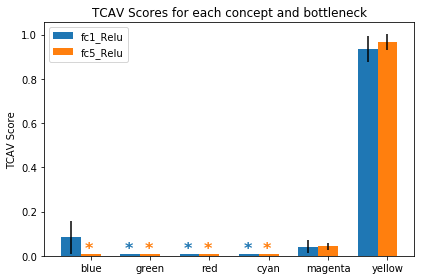

In [2]:
 get_tcavs.main(model_name='MNIST Model 2',
                 cav_dir='mnist5_balanced',
                 ckpt_path='models/mnist5_balanced.ckpt',
                 target='zebra_balanced')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Tensor values in checkpoint
tensor_name:  beta1_power
0.0
tensor_name:  beta2_power
7.12157e-09
tensor_name:  fc1/bias
[0.1332279  0.20281146 0.09216446 0.06793497 0.1416289  0.14320646
 0.12407366 0.1751684  0.12214636 0.0843036  0.09385013 0.16140299
 0.1350962  0.12379205 0.13359149 0.23183234 0.10859682 0.10171884
 0.11396986 0.14195915 0.12222945 0.12889433 0.07265207 0.11477198
 0.13262343 0.1600959  0.13553195 0.10488203 0.17821257 0.11968779
 0.10015724 0.11345317 0.07976639 0.18158896 0.08843645 0.09982585
 0.13696542 0.175709   0.14255366 0.06830368 0.22931983 0.19456589
 0.15689312 0.12455751 0.10682677 0.10968471 0.17351279 0.09157982
 0.13997217 0.15814175]
tensor_name:  fc1/bias/Adam
[-5.3274138e-03 -6.7431439e-04 -2.4979799e-03 -4.5580004e-04
  2.5534295e-03 -6.1458242e-03  2.6550787e-03  1.2322720e-03
  3.9534800e-04  1.1704824e-37  3.0135915e-03 -7.06

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from models/mnist5_blue2.ckpt
Variables after loading checkpoint
[ 0.0510535   0.07124096  0.10220792  0.24248144  0.11162003  0.07989319
  0.07868024  0.24988711  0.19506684  0.1031841   0.16438499  0.06909209
  0.13593024  0.13806427  0.24940246  0.15558937  0.17748334  0.1058204
  0.19689198  0.15660386  0.01208725  0.17462602  0.09267304  0.24340451
  0.09729622  0.15598476 -0.00610772  0.10201663  0.07627239  0.08203066
  0.1858598   0.02332889  0.08895369  0.10231949  0.15833166  0.2293046
  0.10158268  0.15315996  0.1         0.12646332  0.0332595   0.07078454
  0.14352454  0.08024058  0.24004482  0.07720555  0.14054851  0.14099297
  0.1019514   0.12684517]
INFO:tensorflow:Restoring parameters from models/mnist5_blue2.ckpt
Bottleneck tensors
{'fc1_truncated_normal': <tf.Tensor 'fc1/truncated_normal:0' shape=(50, 50) dtype=float32>, 'fc1_Add': <tf.Tensor 'fc

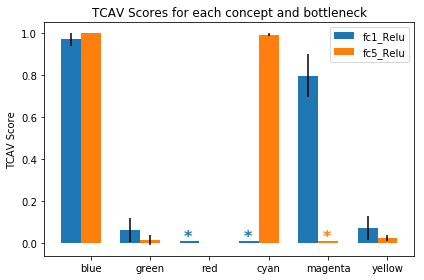

In [2]:
 get_tcavs.main(model_name='MNIST Model 1',
                 cav_dir='mnist5_blue2',
                 ckpt_path='models/mnist5_blue2.ckpt',
                 target='zebra')